# **Adult Census Income**
## Author: Anthony Torres
## Task:  Predict whether income exceeds $50K/yr based on census data

### Project task and source files were retrieved from the following Kaggle submission - https://www.kaggle.com/uciml/adult-census-income
### Dataset is based on this - https://archive.ics.uci.edu/ml/datasets/census+income


### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. 

Listing of attributes:

* The last column >50K, <=50K is the target variable indicating whether the people earn less than or larger than 50K per year
* age: continuous.
* workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt: continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain: continuous.
* capital-loss: continuous.
* hours-per-week: continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [4]:
df = pd.read_csv("adult.csv")
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

Here's a brief overview of the steps i'm going to take:

1. EDA (chekcing missing values, removing outliers)
2. Perform basic exploration of relationship, with plots and graphs
3. Separate data set into training and testing
4. Setup dummy variables to take care categorical variables
5. Normalize numerical features if needed
6. Try at least two models and check their model performance
7. Perform cross-validations


First change the target variable income to 0 and 1

In [6]:
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country  income  
0          4356              40  United-States       0  
1          4356              18  United-States       0  
2          4356              40  United-States       0  
3          3900              40  United-States       0  
4          3900              40  United-States       0

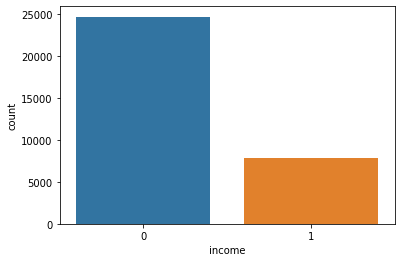

In [7]:
sns.countplot(df['income'])

# Exploratory Data Analysis

In [8]:
df.describe()

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week        income  
count    32561.000000  32561.000000  
mean        40.437456      0.240810  
std         12.347429      0.427581  
min          1.000000      0.000000  
25%         40.000000      0.000000  
50%         40.000000      0.000000  
75%         45.000000      0.000000  
max         99.000000      1.000000

In [9]:
df.shape

(32561, 15)

In [10]:
#Checking for null/NAN values
df.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [11]:
#Correlation Check
df.corr()

age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education.num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital.gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital.loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours.per.week  0.068756 -0.018768       0.148123      0.078409      0.054256   
income          0.234037 -0.009463       0.335154      0.223329      0.150526   

                hours.per.week    income  
age                   0.068756  0.234037  
fnlwgt               -0.018768 -0.009463  
education.num         0.148123  0.335154  
capital.gain          0.078409  0.223329  
capital.loss          0.054256  0.150526  
hours.per.week        1.000000  0.229689  
income                0.229689  1.000000

In [12]:
# 'fnlwgt' has no relation to the other columns.
# Will drop the column
df = df.drop(['fnlwgt'], axis=1)

In [13]:
df.head(20)

age         workclass     education  education.num marital.status  \
0    90                 ?       HS-grad              9        Widowed   
1    82           Private       HS-grad              9        Widowed   
2    66                 ?  Some-college             10        Widowed   
3    54           Private       7th-8th              4       Divorced   
4    41           Private  Some-college             10      Separated   
5    34           Private       HS-grad              9       Divorced   
6    38           Private          10th              6      Separated   
7    74         State-gov     Doctorate             16  Never-married   
8    68       Federal-gov       HS-grad              9       Divorced   
9    41           Private  Some-college             10  Never-married   
10   45           Private     Doctorate             16       Divorced   
11   38  Self-emp-not-inc   Prof-school             15  Never-married   
12   52           Private     Bachelors             13        Widowed   
13   32           Private       Masters             14      Separated   
14   51                 ?     Doctorate             16  Never-married   
15   46           Private   Prof-school             15       Divorced   
16   45           Private          11th              7       Divorced   
17   57           Private       Masters             14       Divorced   
18   22           Private    Assoc-acdm             12  Never-married   
19   34           Private     Bachelors             13      Separated   

           occupation    relationship   race     sex  capital.gain  \
0                   ?   Not-in-family  White  Female             0   
1     Exec-managerial   Not-in-family  White  Female             0   
2                   ?       Unmarried  Black  Female             0   
3   Machine-op-inspct       Unmarried  White  Female             0   
4      Prof-specialty       Own-child  White  Female             0   
5       Other-service       Unmarried  White  Female             0   
6        Adm-clerical       Unmarried  White    Male             0   
7      Prof-specialty  Other-relative  White  Female             0   
8      Prof-specialty   Not-in-family  White  Female             0   
9        Craft-repair       Unmarried  White    Male             0   
10     Prof-specialty       Unmarried  Black  Female             0   
11     Prof-specialty   Not-in-family  White    Male             0   
12      Other-service   Not-in-family  White  Female             0   
13    Exec-managerial   Not-in-family  White    Male             0   
14                  ?   Not-in-family  White    Male             0   
15     Prof-specialty   Not-in-family  White    Male             0   
16   Transport-moving   Not-in-family  White    Male             0   
17    Exec-managerial   Not-in-family  White    Male             0   
18  Handlers-cleaners   Not-in-family  Black    Male             0   
19              Sales   Not-in-family  White    Male             0   

    capital.loss  hours.per.week native.country  income  
0           4356              40  United-States       0  
1           4356              18  United-States       0  
2           4356              40  United-States       0  
3           3900              40  United-States       0  
4           3900              40  United-States       0  
5           3770              45  United-States       0  
6           3770              40  United-States       0  
7           3683              20  United-States       1  
8           3683              40  United-States       0  
9           3004              60              ?       1  
10          3004              35  United-States       1  
11          2824              45  United-States       1  
12          2824              20  United-States       1  
13          2824              55  United-States       1  
14          2824              40  United-States       1  
15          2824              40  United-States       1  
16          2

In [16]:
# I will remove all categorical values with a "?" value 
df = df[ df['native.country'] != "?"]
df = df[ df['workclass'] != "?"]
df = df[ df['education'] != "?"]
df = df[ df['race'] != "?"]
df = df[ df['relationship'] != "?"]
df = df[ df['sex'] != "?"]
df = df[ df['occupation'] != "?"]
df = df[ df['marital.status'] != "?"]

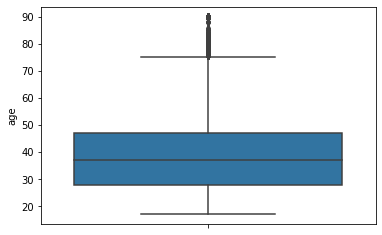

In [17]:
# Checking some outliers
sns.boxplot(y=df['age'])

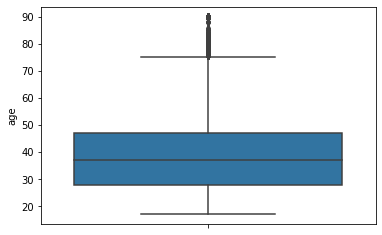

In [18]:
# Obviously shouldn't have ages 0 or above 150
# Will remove values >90 and <0
df = df[ df['age'] <= 90]
df = df[ df['age'] >0]
sns.boxplot(y=df['age'])

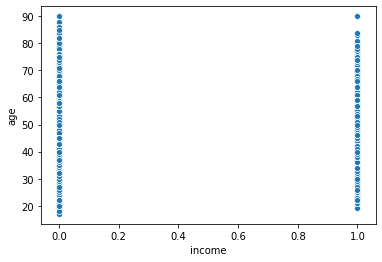

In [19]:
sns.scatterplot(x='income', y = 'age', data=df)

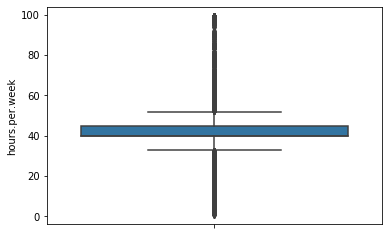

In [21]:
sns.boxplot(y=df['hours.per.week'])

In [22]:
#No way to have 200+ hrs per week.
df = df[ df['hours.per.week'] < 200]

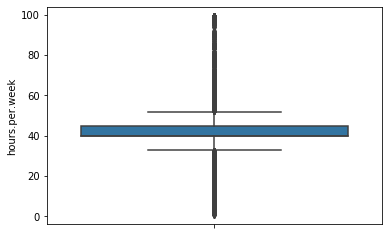

In [23]:
sns.boxplot(y=df['hours.per.week'])

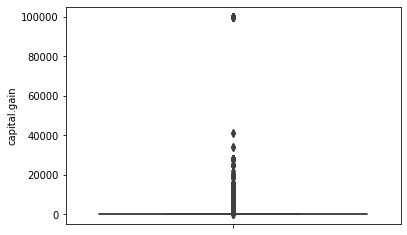

In [24]:
sns.boxplot(y=df['capital.gain'])

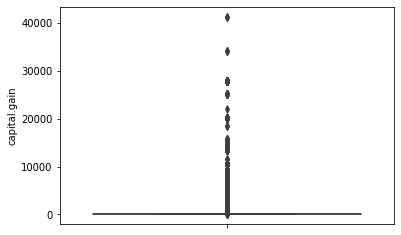

In [25]:
# Removing outliers from cap-gain
df = df[ df['capital.gain'] < 99999]
sns.boxplot(y=df['capital.gain'])

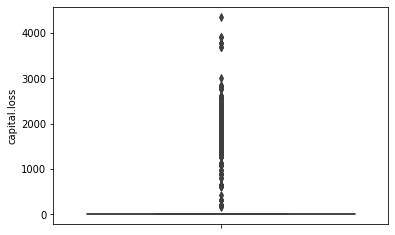

In [26]:
sns.boxplot(y=df['capital.loss'])

In [27]:
df.corr()

age  education.num  capital.gain  capital.loss  \
age             1.000000       0.040166      0.119404      0.060958   
education.num   0.040166       1.000000      0.146012      0.081312   
capital.gain    0.119404       0.146012      1.000000     -0.051368   
capital.loss    0.060958       0.081312     -0.051368      1.000000   
hours.per.week  0.100737       0.148043      0.084356      0.053484   
income          0.239325       0.329919      0.309907      0.153087   

                hours.per.week    income  
age                   0.100737  0.239325  
education.num         0.148043  0.329919  
capital.gain          0.084356  0.309907  
capital.loss          0.053484  0.153087  
hours.per.week        1.000000  0.225425  
income                0.225425  1.000000

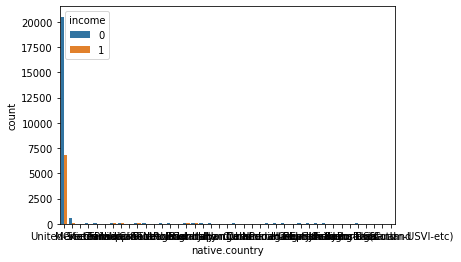

In [28]:
# Wanted to see how much % of the entries are from US
sns.countplot(df['native.country'], hue = df['income'])

In [29]:
# Since majority is from US, will change into a binary (Non-US/US) value
df['native.country'] = df['native.country'].apply(lambda x: 'US' if x == 'United-States' else 'Non-US')
df.head()

age workclass     education  education.num marital.status  \
1   82   Private       HS-grad              9        Widowed   
3   54   Private       7th-8th              4       Divorced   
4   41   Private  Some-college             10      Separated   
5   34   Private       HS-grad              9       Divorced   
6   38   Private          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country  income  
1          4356              18             US       0  
3          3900              40             US       0  
4          3900              40             US       0  
5          3770              45             US       0  
6          3770              40             US       0

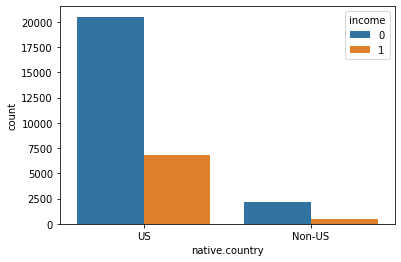

In [31]:
sns.countplot(df['native.country'], hue = df['income'])

In [32]:
df.isnull().any()

age               False
workclass         False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [33]:
#Creating test/train split of (80/20)
#Creating train set
train = df.sample(int(df.shape[0] * 0.8))
print(train.shape)
train.head()

(24011, 14)


age         workclass     education  education.num marital.status  \
31504   19           Private       HS-grad              9  Never-married   
24020   28           Private  Some-college             10  Never-married   
7371    41           Private       HS-grad              9       Divorced   
14519   67  Self-emp-not-inc       1st-4th              2        Widowed   
21175   43           Private       HS-grad              9       Divorced   

            occupation   relationship   race     sex  capital.gain  \
31504            Sales      Own-child  White    Male             0   
24020     Adm-clerical  Not-in-family  White  Female             0   
7371      Craft-repair  Not-in-family  White    Male             0   
14519    Other-service  Not-in-family  Black  Female             0   
21175  Exec-managerial      Unmarried  White  Female             0   

       capital.loss  hours.per.week native.country  income  
31504             0              38             US       0  
24020             0              40             US       0  
7371              0              40             US       0  
14519             0              20             US       0  
21175             0              40             US       1

In [34]:
testing_rows = [idx for idx in df.index if idx not in train.index]
len(testing_rows)

6003

In [35]:
test_df = df.loc[testing_rows, :]
print(test_df.shape)
test_df.head()

(6003, 14)


age    workclass  education  education.num      marital.status  \
5    34      Private    HS-grad              9            Divorced   
8    68  Federal-gov    HS-grad              9            Divorced   
13   32      Private    Masters             14           Separated   
20   37      Private  Bachelors             13       Never-married   
25   21      Private  Assoc-voc             11  Married-civ-spouse   

         occupation   relationship   race     sex  capital.gain  capital.loss  \
5     Other-service      Unmarried  White  Female             0          3770   
8    Prof-specialty  Not-in-family  White  Female             0          3683   
13  Exec-managerial  Not-in-family  White    Male             0          2824   
20  Exec-managerial  Not-in-family  White    Male             0          2824   
25     Craft-repair        Husband  White    Male             0          2603   

    hours.per.week native.country  income  
5               45             US       0  
8               40             US       0  
13              55             US       1  
20              40             US       1  
25              40             US       0

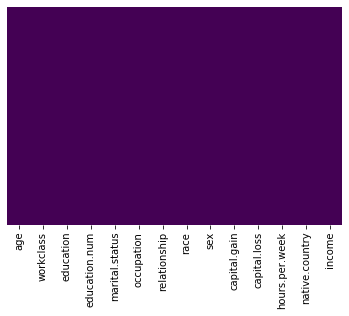

In [36]:
##EDA
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
# Using just the numerical variables (will come back to revisit)
train_NUM = train[['income','age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']]
train_NUM.head()

income  age  education.num  capital.gain  capital.loss  hours.per.week
31504       0   19              9             0             0              38
24020       0   28             10             0             0              40
7371        0   41              9             0             0              40
14519       0   67              2             0             0              20
21175       1   43              9             0             0              40

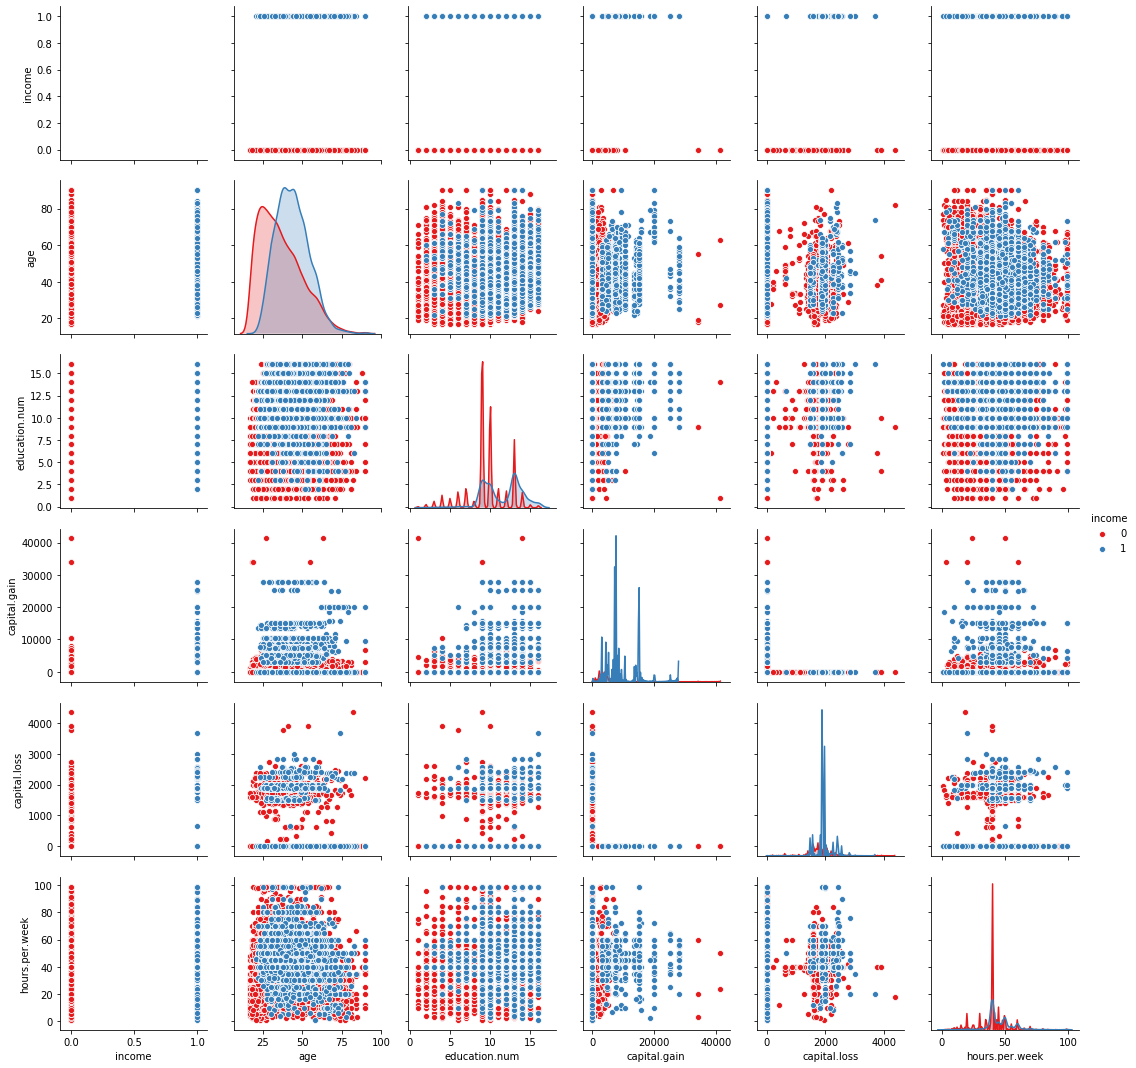

In [38]:
sns.pairplot(train_NUM, hue='income',palette='Set1')

In [39]:
#Normalizing cap-gain/cap-loss to a range of 0-10
train_NUM["capital.gain"]=((train_NUM["capital.gain"]-train_NUM["capital.gain"].min())/(train_NUM["capital.gain"].max()-train_NUM["capital.gain"].min()))*10
train_NUM["capital.loss"]=((train_NUM["capital.loss"]-train_NUM["capital.loss"].min())/(train_NUM["capital.loss"].max()-train_NUM["capital.loss"].min()))*10   
train_NUM.describe()

income           age  education.num  capital.gain  capital.loss  \
count  24011.000000  24011.000000   24011.000000  24011.000000  24011.000000   
mean       0.245554     38.379951      10.092541      0.146294      0.201037   
std        0.430424     13.137270       2.550664      0.626759      0.923284   
min        0.000000     17.000000       1.000000      0.000000      0.000000   
25%        0.000000     28.000000       9.000000      0.000000      0.000000   
50%        0.000000     37.000000      10.000000      0.000000      0.000000   
75%        0.000000     47.000000      12.000000      0.000000      0.000000   
max        1.000000     90.000000      16.000000     10.000000     10.000000   

       hours.per.week  
count    24011.000000  
mean        40.880596  
std         11.958798  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

# Creating a Logistic Regression model 

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train_NUM.drop('income',axis=1), 
                                                    train_NUM['income'], test_size=0.20, 
                                                    random_state=101)
model6 = LogisticRegression()
model6.fit(X_train,y_train)
predictions = model6.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3619
           1       0.72      0.37      0.49      1184

    accuracy                           0.81      4803
   macro avg       0.77      0.66      0.69      4803
weighted avg       0.80      0.81      0.79      4803

0.8094940662086196


## Got accuracy of .81
## Would like to check the relationships for the categorical columns.

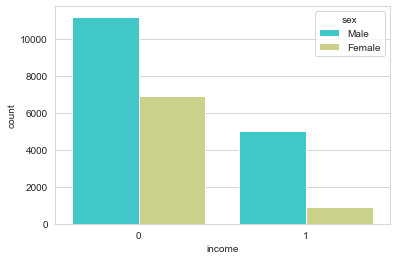

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='income',hue='sex',data=train,palette='rainbow')

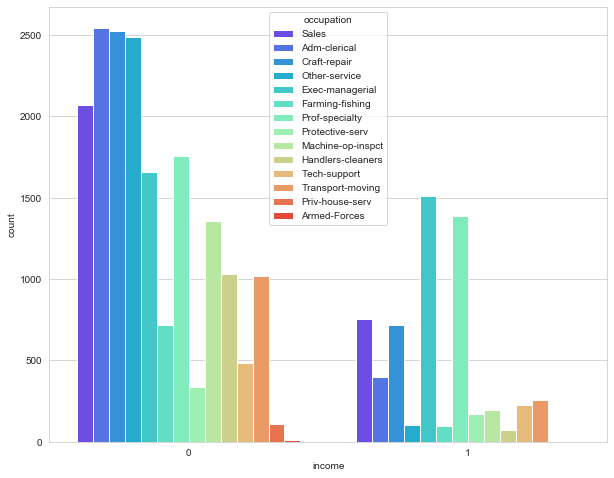

In [42]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='income',hue='occupation',data=train,palette='rainbow', ax=ax)

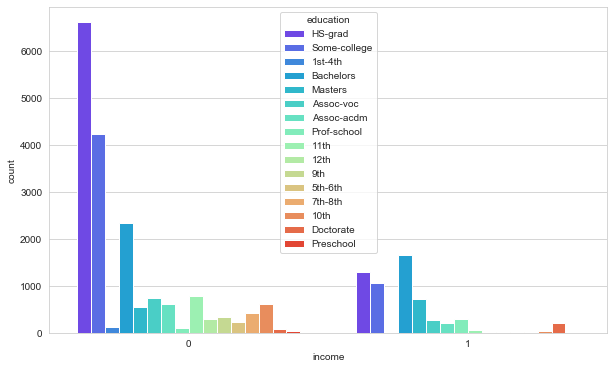

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='income',hue='education',data=train,palette='rainbow', ax=ax)

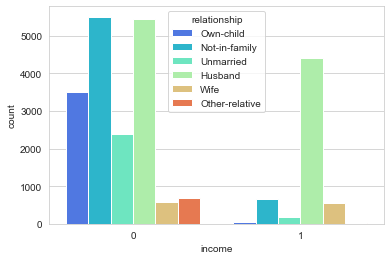

In [44]:
sns.countplot(x='income',hue='relationship',data=train,palette='rainbow')

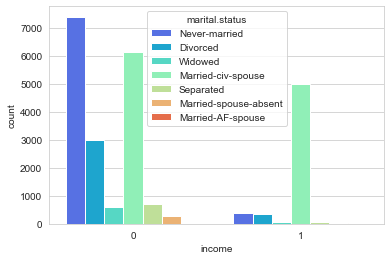

In [46]:
sns.countplot(x='income',hue='marital.status',data=train,palette='rainbow')

# The ratio for marital-status is very high
# So is the one for gender

In [47]:
df_mar = train[['income', 'marital.status']]
df_mar['marital.status'] = df_mar['marital.status'].apply(lambda x: 'Married' if (x == 'Married-civ-spouse') else 'Not Married')
df_mar.head()

income marital.status
31504       0    Not Married
24020       0    Not Married
7371        0    Not Married
14519       0    Not Married
21175       1    Not Married

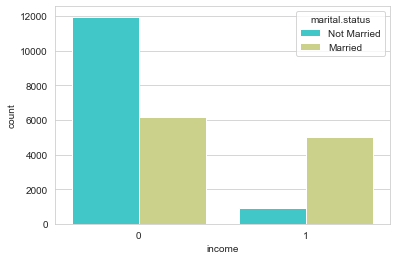

In [48]:
sns.countplot(x='income',hue='marital.status',data=df_mar,palette='rainbow')

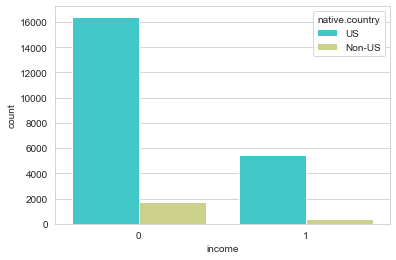

In [49]:
sns.countplot(x='income',hue='native.country',data=train,palette='rainbow')

In [50]:
#Will make an attempt to include these in the model
sex = pd.get_dummies(train['sex'],drop_first=True)

In [51]:
married = pd.get_dummies(df_mar['marital.status'],drop_first=True)
married

Not Married
31504            1
24020            1
7371             1
14519            1
21175            1
...            ...
27446            1
4099             0
2696             0
16534            0
17715            1

[24011 rows x 1 columns]

In [52]:
train1 = pd.concat([train_NUM, sex, married], axis=1)

In [53]:
train1.describe()

income           age  education.num  capital.gain  capital.loss  \
count  24011.000000  24011.000000   24011.000000  24011.000000  24011.000000   
mean       0.245554     38.379951      10.092541      0.146294      0.201037   
std        0.430424     13.137270       2.550664      0.626759      0.923284   
min        0.000000     17.000000       1.000000      0.000000      0.000000   
25%        0.000000     28.000000       9.000000      0.000000      0.000000   
50%        0.000000     37.000000      10.000000      0.000000      0.000000   
75%        0.000000     47.000000      12.000000      0.000000      0.000000   
max        1.000000     90.000000      16.000000     10.000000     10.000000   

       hours.per.week          Male   Not Married  
count    24011.000000  24011.000000  24011.000000  
mean        40.880596      0.674732      0.535546  
std         11.958798      0.468484      0.498745  
min          1.000000      0.000000      0.000000  
25%         40.000000      0.000000      0.000000  
50%         40.000000      1.000000      1.000000  
75%         45.000000      1.000000      1.000000  
max         99.000000      1.000000      1.000000

In [54]:
train1.isnull().any()

income            False
age               False
education.num     False
capital.gain      False
capital.loss      False
hours.per.week    False
Male              False
Not Married       False
dtype: bool

### Another Logistic Regression Model

In [55]:
X_train, X_test, y_train, y_test = train_test_split(train1.drop('income',axis=1), 
                                                    train1['income'], test_size=0.20, 
                                                    random_state=101)
model1 = LogisticRegression()
model1.fit(X_train,y_train)
predictions = model1.predict(X_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      3619
           1       0.72      0.55      0.62      1184

    accuracy                           0.84      4803
   macro avg       0.79      0.74      0.76      4803
weighted avg       0.83      0.84      0.83      4803

0.8365604830314387


## Got .84 accuracy

# 10 Fold Cross-Validation

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model1, X_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.8314256  0.82830385 0.83862572 0.83550234 0.8443519  0.84070796
 0.8359375  0.83958333 0.834375   0.825     ]


In [57]:
scores.mean()

0.8353813204781281

### .8369, close

# Decision trees

In [58]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
Tpredictions = tree.predict(X_test)
print(confusion_matrix(y_test,Tpredictions))
print(classification_report(y_test,Tpredictions))
print(accuracy_score(y_test, Tpredictions))

[[3447  172]
 [ 593  591]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3619
           1       0.77      0.50      0.61      1184

    accuracy                           0.84      4803
   macro avg       0.81      0.73      0.75      4803
weighted avg       0.83      0.84      0.83      4803

0.8407245471580262


### Around .84 Accuracy

In [60]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(train1.columns[1:])
features

C:\Users\23267958\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


['age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'Male',
 'Not Married']

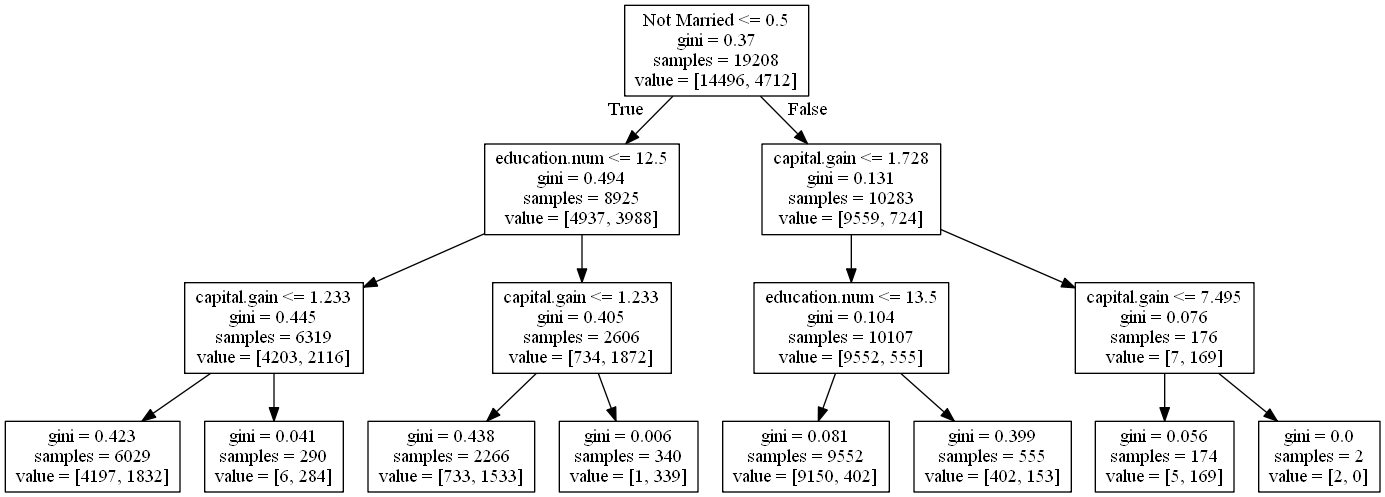

In [61]:
dot_data = StringIO()  

export_graphviz(tree, out_file=dot_data, feature_names=features)
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Changing max_depth to 10

[[3466  153]
 [ 564  620]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3619
           1       0.80      0.52      0.63      1184

    accuracy                           0.85      4803
   macro avg       0.83      0.74      0.77      4803
weighted avg       0.85      0.85      0.84      4803

0.8507183010618363


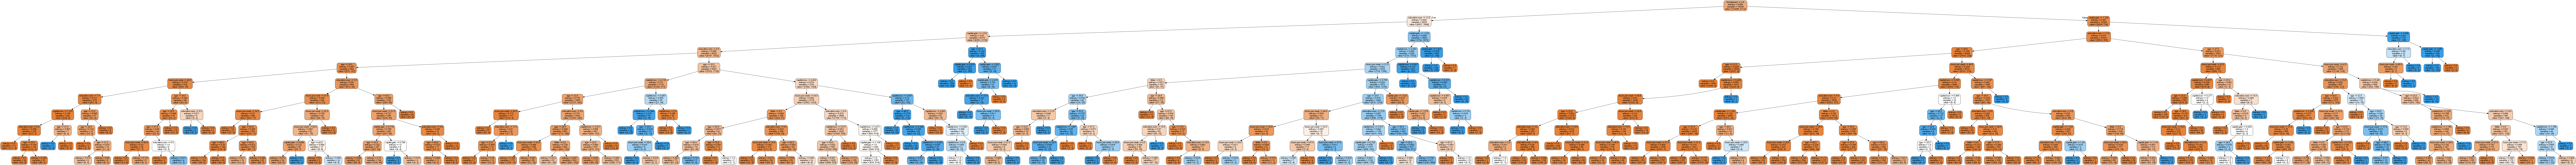

In [62]:
Tmodel = DecisionTreeClassifier(max_depth=10, criterion='entropy')
Tmodel.fit(X_train,y_train)
predictions = Tmodel.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

dot_data = StringIO()  
export_graphviz(Tmodel, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Around .85 Accuracy

## Highest Score: 0.8507183010618363, Decision Tree